## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II


# Introducción al aprendizaje computacional

## Actividad 1

### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)



En esta actividad vamos a estudiar una primera aproximación a los modelos de aprendizaje computacional, utilizando como base un problema de clasifiación y el modelo de clasificación logístico.


## Actividad en grupos
### Nombres:

Carlos Silva -  201920463
Camilo Suarez - 200321493
Catalina Lago - 201113637

**Instrucciones:** Por favor escriba los nombres de los integrantes de su grupo. Esta actividad debe ser entregada a más tardar dentro de 8 días, con la respuesta para los ejercicios y preguntas en cada numeral.



## 1. Aprendizaje computacional

El aprendizaje computacional o **Machine Learning** (ML), utiliza algoritmos con parámetros libres que se puedan ajustar de manera automática, con el objetivo de mejorar el desempeño de los modelos a partir de la información disponible.

El aprendizaje computacional se circunscribe en el campo de la Inteligencia Computacional, o lo que se conoce como Inteligencia Artificial, mediante la búsqueda de patrones a partir de los *Datos*. Entonces, los algoritmos desarrollados dentro del Machine Learning (ML a partir de ahora) se pueden entender como los bloques fundacionales que permiten aprender computacionalmente a partir de los datos. De esta manera, generalizando los datos en lugar de solo almacenarlos y devolver busquedas específicas, como en los sistemas relacionales de bases de datos.


### Tipos de aprendizaje

Los tipos de problemas sobre los que se trabaja en ML se pueden entender como de tipo **supervisado**, **no supervisado**, y **semi-supervisado**. 

**Aprendizaje supervisado**

El aprendizaje supervisado se refiere a modelos, o conjuntos de algoritmos, que aproximan o estiman una función $f(x)$ que representa la relación entre la variable dependiente $Y$ (etiqueta o valor objetivo) y el conjunto de variables independientes $X$. Por ello a los algoritmos de tipo supervisado se les asocia usualmente con modelos predictivos, donde dado un conjunto de datos $X$, se puede predecir un nuevo valor de la variable dependiente $Y$. 

De acuerdo con el tipo de valores en $Y$, se pueden definir dos tipos principales de problemas y algoritmos para analizar los datos:

- Problemas de clasificación

Siempre que la variable $Y$ se refiera a un grupo de categorías (valores sin ningún orden en particular), como por ejemplo bueno/malo, pequeño/grande, la tarea de predecir $Y$ puede ser considerada como un problema de clasificación. En este sentido, las variables de salida se conocen como etiquetas o categorías.

- Problemas de regresión

Un problema de regresión consiste en estimar y/o predecir una variable dependiente (o valor objetivo) $Y$ con valores continuos. Por ejemplo, predecir el precio de una vivienda, de acciones, alimentos, etc. 

**Aprendizaje no-supervisado**
    
El aprendizaje no-supervisado considera problemas donde la variable dependiente $Y$, o las etiquetas para el conjunto de datos, no está disponible. Es decir, cuando $Y$ no está contenida en el conjunto de datos. Entonces, en lugar de estimar o predecir una variable, un algoritmo no-supervisado utiliza técnicas sobre el conjunto de datos de entrada $X$ para detectar patrones, encontrar reglas, o resumir y agrupar los datos. Usualmente, los algoritmos no-supervisados son utilizados para el análisis descriptivo y la modelación, donde se necesita una primera aproximación a los datos, desarrollar una intuición y extraer nuevo conocmiento que es desconocido para el analista y/o experto. 

En el aprendizaje no-supervisado, se tienen dos tareas principales, la reducción de dimensionalidad y el análisis de clustering.

- Reducción de dimensionalidad 

La reducción de dimensionalidad busca encontrar la estructura subyacente de los datos, reduciendo la cantidad de información disponible en el conjunto de datos $X$. Por ejemlo, es muy conocido el análisis de componentes principales. 

- Clustering 

El análisis de clustering consiste en agrupar un conjunto de datos $X$ de manera que cada grupo contenga observaciones más similares entre sí que con las observaciones de otros grupos. Estos grupos son denominados *clusters*. Es una técnica bastante común para la exploración de los datos y su análisis. 


#### Otros tipos de aprendizaje

Más allá de estos dos tipos de aprendizaje presentados anteriormente, existen otros tipos que son bastante útiles dependiendo de la naturaleza del problema. Por ejemplo, el **aprendizaje semi-supervisado** (https://medium.com/inside-machine-learning/placeholder-3557ebb3d470) o el **aprendizaje por refuerzo** (https://medium.com/machine-learning-for-humans/reinforcement-learning-6eacf258b265) 

## 2. Problema de clasificación: riesgo de default

### 2.1 Datos

Como hemos visto, una tarea muy usual dentro del ML es la de la clasificación. Pero antes, vamos a importar las bibliotecas que vamos a usar en este cuaderno.

In [2]:
# Algunos paquetes iniciales que vamos a utilizar
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt


https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [3]:
data = pd.read_csv("germancredit.csv")

In [4]:
data.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [5]:
data.dtypes

Default             int64
checkingstatus1    object
duration            int64
history            object
purpose            object
amount              int64
savings            object
employ             object
installment         int64
status             object
others             object
residence           int64
property           object
age                 int64
otherplans         object
housing            object
cards               int64
job                object
liable              int64
tele               object
foreign            object
dtype: object

In [6]:
data.Default.value_counts()

0    700
1    300
Name: Default, dtype: int64

La clase positiva (default=1) tiene menos casos.  Además, es 5 veces más costoso clasificar a un usuario como bueno (Defualt=0) cuando es malo (Default=1), que clasificarlo como malo cuando es bueno.

In [7]:
data.foreign.value_counts()

A201    963
A202     37
Name: foreign, dtype: int64

Vemos que la mayoría de clientes de la base de datos son extranjeros.

## 2.2 Codificacion de variables categoricas

In [8]:
#Se crean variables dummies
credit_1 = data.copy()
credit_1 = pd.get_dummies(credit_1, columns=['checkingstatus1','history','purpose','savings',
                                   'employ','status','others','property','otherplans','housing','job','tele', 
                                   'foreign'], prefix = ['checkingstatus1','history','purpose','savings',
                                   'employ','status','others','property','otherplans','housing','job','tele', 
                                   'foreign'])

print(credit_1.head())

   Default  duration  amount  installment  residence  age  cards  liable  \
0        0         6    1169            4          4   67      2       1   
1        1        48    5951            2          2   22      1       1   
2        0        12    2096            2          3   49      1       2   
3        0        42    7882            2          4   45      1       2   
4        1        24    4870            3          4   53      2       2   

   checkingstatus1_A11  checkingstatus1_A12  ...  housing_A152  housing_A153  \
0                    1                    0  ...             1             0   
1                    0                    1  ...             1             0   
2                    0                    0  ...             1             0   
3                    1                    0  ...             0             1   
4                    1                    0  ...             0             1   

   job_A171  job_A172  job_A173  job_A174  tele_A191  tele_A19

In [9]:
#Se crea X y Y para ingresarlo a la regresion logistica
X = credit_1.iloc[:, 1:62]#[['duration','amount','installment','residence','age','cards','liable']]
Y = credit_1.iloc[:, 0]
X.shape

(1000, 61)

### 3. Regresión logística

Podemos estudiar un problema de clasificación desde una perspectiva probabilística, examinando una situación donde la variable respuesta ($Y_i$) consiste de dos categorías ($\{0,1\}$). La *regresión logística* estima la probabilidad de que una observación pertenezca a una de las dos categorías.

Entonces se modela la función de probabilidad $p(Y_i=1)$ de tal manera que tome un valor entre 0 y 1. La función de regresión logística consiste en la función *sigmoide* ($\sigma(\cdot)$) $$ p(Y_i)=p(Y_i=1)=\frac{e^{\beta_0 + \beta_1X_{1} + ... + \beta_k X_{k}}}{1+e^{\beta_0 + \beta_1X_{1} + ... + \beta_k X_{k}}}=\frac{e^{Z_i}}{1+e^{Z_i}}=\sigma(Z_i)$$
donde se tiene que 
$$log\frac{p(Y_i)}{1-p(Y_i)}=\beta_0 + \beta_1X_{1} + ... + \beta_k X_{k}.  $$


Por lo tanto, manteniendo todo lo demás constante, se puede estimar el cambio que una unidad extra en $X_1$ tiene sobre  el chance (o el *log-odds*) $log\frac{p(Y_i)}{1-p(Y_i)}$. Esta estimación está dada por $\hat \beta_1$. 


Los coeficientes del modelo se pueden estimar por el método de máxima verosimilitud, buscando iterativamente estimadores que maximicen la función de verosimilitud: $$ F_{\mathbf{\beta}}=\prod_{i:Y_i=1} p(Y_i)\prod_{i':Y_{i'}=0}(1-p(Y_{i'})). $$


Finalmente, la extensión del modelo logístico para múltiples clases o categorías ($C$) se hace calculando la probabilidad de una categoría ($C_i$) frente al resto y utilizando lo que se conoce como una función *softmax*: 
$$ \sigma (Z_i )={\frac {e^{Z_{i}}}{\sum _{j=1}^{|C|}e^{Z_{j}}}}{\text{ para }}i=1,\dotsc ,|C|$$


Miremos un ejemplo con nuestros datos sobre el comportamiento de los clientes del banco. Primero descargamos los paquetes que vamos a utilizar:

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

Por defecto, la funcion `LogisticRegression()` encuentra una solución mediante el algoritmo de Broyden–Fletcher–Goldfarb–Shanno (BFGS):  https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

In [11]:
log = LogisticRegression(penalty='none', max_iter=100) 
log.fit(X, Y)
y_pred_log = log.predict(X)
log_coef = log.coef_
print(log_coef)

[[ 2.45637422e-02  6.82219078e-05  2.14714996e-01 -1.14181758e-01
  -6.69258961e-03 -4.16372295e-02 -9.80477167e-02  7.62760187e-01
   2.90888151e-01 -1.09167116e-01 -1.17633787e+00  2.68811087e-01
   2.63088691e-01 -1.65159331e-01 -1.62135457e-03 -5.96975738e-01
   5.27428233e-01 -4.90556933e-01 -2.47869766e-02 -1.09261792e-01
  -4.12790482e-01  1.11330705e-02  6.83164719e-02  1.95575762e-01
  -4.16673484e-02  4.47533495e-02  4.57981707e-01  5.60507977e-02
  -1.04634510e-01 -1.75249474e-01 -4.66005167e-01  6.11736203e-02
   1.80746726e-01 -9.82223492e-03 -4.39658148e-01 -2.42966086e-02
   1.42195863e-01  1.07068453e-01 -3.89229348e-01 -9.18916120e-02
  -8.28150605e-02  9.16419983e-02 -2.40683583e-01 -3.76089212e-01
  -5.09667523e-02 -2.81970255e-02  2.23396345e-01  2.29098338e-01
   9.22156723e-02 -5.53170655e-01  9.82123009e-02 -3.97876095e-01
   6.78071488e-02 -9.79992528e-03 -5.38388644e-02 -1.25500750e-01
  -4.27171051e-02  2.54411072e-02 -2.57297752e-01 -2.92503986e-02
  -2.02606

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
log.n_iter_

array([100])

### Ejercicio 3.1

Ajuste las opciones de la funcion `LogisticRegression`para conseguir que la solucion converja. Puede examinar la documentación de Python: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [13]:
#Se ajusta el numero de iteraciones para lograr que la regresion converja. 
log = LogisticRegression(penalty='none', max_iter=5000)
log.fit(X, Y)
y_pred_log = log.predict(X)
log_coef = log.coef_
print(log_coef)

[[ 2.86957326e-02  1.21489586e-04  2.81013574e-01  9.20603615e-03
  -1.71782256e-02  2.57678523e-01  1.18642873e-01  5.96275092e-01
   1.39782720e-01 -3.60109461e-01 -9.98461207e-01  4.91017536e-01
   4.25713057e-01 -1.67456084e-01 -3.07304197e-01 -1.06448317e+00
   6.25761992e-01 -1.16210263e+00 -2.70911863e-01 -2.21618963e-01
  -2.32427412e-01  3.58061600e-02  2.74909828e-01  6.08121502e-01
  -2.00080620e-01 -7.99708554e-02  4.03175217e-01  1.13551658e-01
  -1.54109537e-02 -5.35753442e-01 -5.88075336e-01  4.28796163e-02
   1.11512021e-01 -2.64037084e-02 -7.23747765e-01 -2.67530205e-02
   2.90812016e-01 -9.24304226e-02 -5.80427214e-01 -2.40467236e-01
  -4.52052018e-02  2.93968108e-01 -8.71275763e-01 -4.03238989e-01
  -1.24645884e-01 -2.49065745e-01  1.54437760e-01 -8.44527564e-02
   5.52424160e-02 -5.93302516e-01  5.92590350e-02 -3.50092795e-01
  -3.31679096e-01 -1.78834979e-01 -1.08381834e-01 -1.16382242e-01
  -2.18913802e-01 -1.69800939e-01 -4.52711917e-01  1.56638938e-01
  -7.79151

In [14]:
#Se identifica el numero de iteraciones minimas para que la regresion logistica converja
log.n_iter_

array([436])

## Pregunta 3.2 

Cuántas iteraciones necesitó?

Se necesitan >=634 iteraciones para quela regresion converja

## 4. Construccion de modelos predictivos

Partimos los datos de manera aleatoria en un conjunto de entrenamiento y otro de prueba. De esta manera, estimamos los coeficientes sobre los datos de entrenamiento, y ese mismo modelo lo probamos sobre los datos de prueba con el fin de controlar que el modelo esté generalizando bien y no se sobreajuste a los datos.

A continuación ejecutamos el codigo para obtener una partición con el 40% de los datos en el conjunto de prueba. Nótese que por defecto la funcion `train_test_split` sigue una partición estratificada, es decir, mantiene la distribución inicial de las clases en ambos conjuntos de entrenamiento y prueba:


In [15]:
# separación de la base en Train y Test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=42)
print("Tamaño de CE, CP: ", y_train.shape, y_test.shape)
print("Observaciones de la clase positiva en entrenamiento: " +str(sum(y_train)) +" y en prueba: " +str(sum(y_test)))

Tamaño de CE, CP:  (600,) (400,)
Observaciones de la clase positiva en entrenamiento: 182 y en prueba: 118


Lo podemos verificar:

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)
print("Tamaño de CE, CP: ", y_train.shape, y_test.shape)
print("Observaciones de la clase positiva en entrenamiento: " +str(sum(y_train)) +" y en prueba: " +str(sum(y_test)))

Tamaño de CE, CP:  (600,) (400,)
Observaciones de la clase positiva en entrenamiento: 180 y en prueba: 120


A continuación ajustamos el modelo logístico y lo probamos:

In [17]:
#Realizacion de la regresion logistica
logT = LogisticRegression(penalty='none', max_iter=1500)
logT.fit(X_train, y_train)
y_tr = logT.predict(X_train)
y_pred = logT.predict(X_test)

Con menos datos para entrenar probablemente el algoritmo necesite más iteraciones:

In [18]:
logT.n_iter_
#Efectivamente el algoritmo necesita mas datos, pasando de 634 a 972.

array([860])

Examinemos los coeficientes del modelo y su desviación con respecto a la estimación anterior (que utilizaba todos los datos de la muestra).

In [19]:
#Se imprime coeficiente del modelo 2 con menos datos. 
logT_coef = logT.coef_
print(logT_coef)

[[ 2.67902306e-02  9.87686468e-05  3.31672995e-01 -2.46206736e-03
  -5.59688764e-03  2.37481857e-01  4.12011853e-01  4.46556499e-01
   1.66130175e-01 -4.17135325e-01 -1.06724928e+00  3.18324805e-01
   4.07213242e-01 -1.92908533e-01 -2.17343700e-01 -1.18698375e+00
   1.77960300e-01 -1.00420380e+00 -6.39911853e-01 -2.61312639e-01
  -2.80214029e-01 -1.22060321e-01  1.53105450e-01  1.15081389e+00
  -2.84222963e-03 -4.30327032e-02  7.15865018e-01  2.78803057e-01
  -2.78985141e-01 -1.27419818e+00 -3.13182683e-01  7.64532071e-01
  -2.35725715e-02 -2.15525714e-01 -1.16915362e+00 -2.27978099e-01
   2.68989528e-01 -2.30230351e-01 -6.47949700e-01 -2.62507409e-01
  -2.16498747e-01  2.95808473e-01 -9.51007657e-01 -5.41678339e-01
  -2.62939788e-01 -2.61144912e-01  1.94065107e-01  4.65450273e-02
  -6.54701136e-02 -8.52772846e-01  5.12701682e-01 -3.70290687e-01
  -1.01410893e+00 -1.98725043e-01 -1.49834023e-01 -1.11796155e-01
  -4.11342711e-01 -2.67769462e-01 -6.03928470e-01  5.07094933e-01
  -1.37879

In [20]:
#Resta de los coeficientes de ambos modelos para observar variaciones de los coeficientes.
print(log_coef-logT_coef)

[[ 1.90550193e-03  2.27209393e-05 -5.06594214e-02  1.16681035e-02
  -1.15813379e-02  2.01966658e-02 -2.93368980e-01  1.49718593e-01
  -2.63474558e-02  5.70258637e-02  6.87880747e-02  1.72692730e-01
   1.84998158e-02  2.54524490e-02 -8.99604967e-02  1.22500577e-01
   4.47801692e-01 -1.57898823e-01  3.68999990e-01  3.96936755e-02
   4.77866168e-02  1.57866481e-01  1.21804378e-01 -5.42692391e-01
  -1.97238391e-01 -3.69381522e-02 -3.12689801e-01 -1.65251399e-01
   2.63574188e-01  7.38444740e-01 -2.74892653e-01 -7.21652455e-01
   1.35084593e-01  1.89122005e-01  4.45405854e-01  2.01225078e-01
   2.18224875e-02  1.37799929e-01  6.75224860e-02  2.20401729e-02
   1.71293546e-01 -1.84036409e-03  7.97318940e-02  1.38439350e-01
   1.38293904e-01  1.20791671e-02 -3.96273463e-02 -1.30997784e-01
   1.20712530e-01  2.59470329e-01 -4.53442647e-01  2.01978913e-02
   6.82429831e-01  1.98900642e-02  4.14521892e-02 -4.58608668e-03
   1.92428909e-01  9.79685226e-02  1.51216553e-01 -3.50455995e-01
   5.99641

### Ejercicio 4.1

Implemente un proceso de validación cruzada cambiando la semilla de las particiones de train (CE) y test (CP). Estimae la varianza de los estimadores y concluya si su *mejor* modelo es estable entre distintas particiones.

In [21]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
import random
loglist = list()
y_tr = list()
y_pred = list()
X_train_, X_test_, y_train_, y_test_ = (list(), list(), list(), list())
score = list()
#Se realizan 100 iteraciones con diferentes semillas para revisar la estabilidad del modelo 
for i in range(100):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=i, stratify=Y)
    X_train_.append(X_train)
    y_train_.append(y_train)
    X_test_.append(X_test)
    y_test_.append(y_test)
    loglist.append(LogisticRegressionCV(cv=5, max_iter=2000))
    loglist[i].fit(X_train_[i], y_train_[i])
    y_tr.append(loglist[i].predict(X_train_[i]))
    y_pred.append(loglist[i].predict(X_test_[i]))
    score.append(loglist[i].score(X_test,y_test))

In [22]:
import numpy as np
from scipy import stats
# Estadística descriptiva de los resultados de las 100 iteraciones de la regresión Logística variando la semilla. 
# Se encuentra que la varianza es minima, observándose estabilidad del modelo
stats.describe(score)

DescribeResult(nobs=100, minmax=(0.7125, 0.78), mean=0.744175, variance=0.0002890220959595957, skewness=0.027018171895771357, kurtosis=-0.5969129066652394)

In [23]:
best_mdl_index = score.index(np.max(score))

In [24]:
#Numero de la iteracion de regresiones logisticas que tiene el mejor score (70). 
best_mdl_index 

95

## 5. Evaluacion de los modelos
Hasta ahora hemos estimado los parámetros del modelo logístico. Pero no hemos examinado si la solución es satisfactoria. A continuación examinemos el desempeño de los modelos a partir de su matriz de confusión: 

In [25]:
from sklearn.metrics import confusion_matrix

# Calculamos la matriz de confusión para la prediccion
cm_log = confusion_matrix(y_test_[14], y_pred[14])
np.set_printoptions(precision=2)
print(cm_log)

[[245  35]
 [ 63  57]]


luego de observar la matriz de confusion encontramos que el modelo tiene un accuracy del 75%

Podemos mejorar esta visualización, añadiendo etiquetas para lo que es predicción y lo que es observado en la muestra:

In [26]:
def plot_confusion_matrix(cm, title='Matriz de confusión', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta estimada')

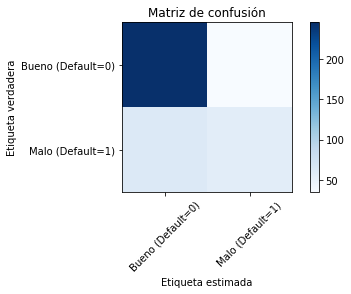

In [27]:
labels=['Bueno (Default=0)' ,'Malo (Default=1)']

plt.figure()
plot_confusion_matrix(cm_log)

Podemos resumir estos resultados, por ejemplo mediante la métrica de *exactitud* o *accuracy*, la cual mide la proporción de aciertos sobre el total de casos.

Para entrenamiento: el Accuracy del modelo es 80% en prediccion y 75% en test

In [28]:
float((y_tr[14] == y_train_[14]).mean())

0.8066666666666666

Para predicción:

In [29]:
float((y_pred[14] == y_test_[14]).mean())

0.755

### Ejercicio 5.1

Calcule una métrica de desempeño que tome en cuenta el coste de errar, donde el coste de predecir que un mal cliente es bueno es 5 veces más alto que el de confundir un buen cliente con uno malo.

In [30]:
# Se crea un score en el cual se castiga por 5 veces cuando no se predice correctamente un buen cliente, por lo tanto el modelo que menos score
# tenga, será el mejor modelo.

new_score = list()
for i in range(100):
    new_score.append(((y_pred[i] != y_test_[i]).astype(int)*5).mean())

In [31]:
# El score del mejor modelo es de 1.075
np.min(new_score)

1.1

In [46]:
# El mejor modelo es el modelo 70 (de los 100 corridos)
new_score.index(np.min(new_score))

70

### Justicia algorítmica

Veamos cómo se comporta el modelo de acuerdo con el origen (extranjero o local) del cliente. Por ejemplo, fijémonos en el balance inicial de los datos de la muestra:

In [47]:
credit_2 = credit_1.copy()
credit_3 = credit_2.loc[credit_2['foreign_A201'] == 1]
X3 = credit_3.iloc[:, 1:62]
Y3 = credit_3.iloc[:, 0]

credit_4 = credit_2.loc[credit_2['foreign_A201'] == 0]
X4 = credit_4.iloc[:, 1:62]
Y4 = credit_4.iloc[:, 0]

In [48]:
#Se observa un desbalanceo de las muestras grande, la mayoria de las observaciones son de clientes extrangeros, 
# pudiendo sesgar el algoritmo frente a los clientes locales al tener un menor entrenamiento para clasificar este tipo de cliente.
print("El numero de clientes extranjeros de la muestra: " +str(X3.shape[0]) +" y los locales: " +str(X4.shape[0]))

El numero de clientes extranjeros de la muestra: 963 y los locales: 37


## Pregunta 5.2

De los clientes locales cuantos han tenido Default?

In [49]:
#El numero de clientes locales que han tenido default son solo 4, siendo muy poca data para entrenar el modelo, 
# permitiendo que se genere un posible sesgo en contra de los clientes locales al momento de otorgar un credito. 
np.sum(credit_4.Default == 1)

4

Vemos que ya hay un sesgo en los datos de entrenamiento. Por lo tanto, podemos esperar que esto se vea reflejado en nuestro modelo:

In [50]:
y_pred_f = logT.predict(X3)
y_pred_l = logT.predict(X4)

Veamos otra manera de visualizar la matriz de confusion:

Extranjeros:


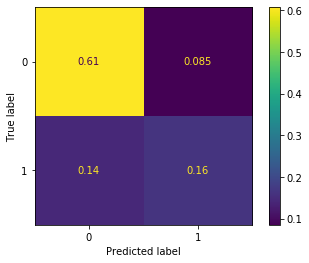

Locales:


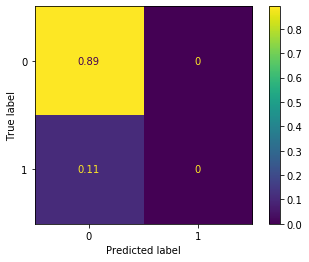

In [51]:
from sklearn.metrics import plot_confusion_matrix

print("Extranjeros:")
plot_confusion_matrix(logT, X3, Y3, normalize='all')  
plt.show() 

print("Locales:")
plot_confusion_matrix(logT, X4, Y4, normalize='all')  
plt.show()

Y las métricas de exactitud:

In [52]:
print("La exactitud para el usuario extranjero:", float((y_pred_f == Y3).mean()))
print("La exactitud para el usuario local:", float((y_pred_l == Y4).mean()))

La exactitud para el usuario extranjero: 0.770508826583593
La exactitud para el usuario local: 0.8918918918918919


### Ejercicio 5.3

Proponga una modelo de clasificación que detecte clientes con un alto riesgo de Default, teniendo en cuenta el costo de clasificar a un cliente erroneamente  junto con la "equidad algoritmica".

In [102]:
# Para corregir el desbalanceo de las muestras, utilizamos el método de resample con el fin de balancear las cargas entre 
# clientes locales con default y sin default

from sklearn.utils import resample
df_majority = credit_4[credit_4['Default'] == 0]
df_minority = credit_4[credit_4['Default'] == 1]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.Default.value_counts()

1    33
0    33
Name: Default, dtype: int64

In [103]:
credit_5 = pd.concat([credit_3, df_upsampled])
credit_5.shape

(1029, 62)

In [104]:
#Luego volvemos a utilizar el método resample para balancear las observaciones entre clientes locales y extranjeros.
from sklearn.utils import resample
df_majority = credit_5[credit_5['foreign_A201'] == 1]
df_minority = credit_5[credit_5['foreign_A201'] == 0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
# Combine majority class with upsampled minority class
credit_6 = pd.concat([df_majority, df_minority_upsampled])
credit_6.foreign_A201.value_counts()

1    963
0    963
Name: foreign_A201, dtype: int64

In [105]:
X = credit_6.iloc[:, 1:62]#[['duration','amount','installment','residence','age','cards','liable']]
Y = credit_6.iloc[:, 0]
X.shape

(1926, 61)

In [108]:
#Se vuelve a crear una particion de train y test con la nueva base de datos balanceada
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=666, stratify=Y)
print("Tamaño de CE, CP: ", y_train.shape, y_test.shape)
print("Observaciones de la clase positiva en entrenamiento: " +str(sum(y_train)) +" y en prueba: " +str(sum(y_test)))

Tamaño de CE, CP:  (1155,) (771,)
Observaciones de la clase positiva en entrenamiento: 450 y en prueba: 301


In [109]:
logT = LogisticRegression(penalty='none', max_iter=1500)
logT.fit(X_train, y_train)
y_tr = logT.predict(X_train)
y_pred = logT.predict(X_test)

In [110]:
credit_2 = credit_5.copy()
credit_3 = credit_2.loc[credit_2['foreign_A201'] == 1]
X3 = credit_3.iloc[:, 1:62]
Y3 = credit_3.iloc[:, 0]

credit_4 = credit_2.loc[credit_2['foreign_A201'] == 0]
X4 = credit_4.iloc[:, 1:62]
Y4 = credit_4.iloc[:, 0]

In [111]:
y_pred_f = logT.predict(X3)
y_pred_l = logT.predict(X4)

Extranjeros:


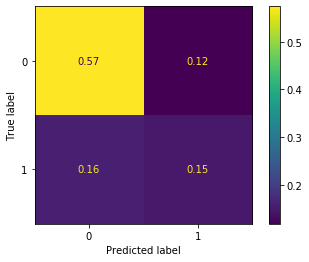

Locales:


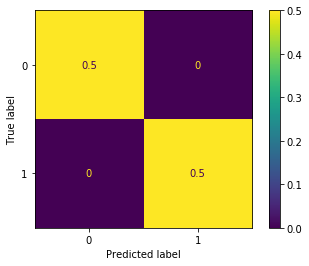

In [112]:
from sklearn.metrics import plot_confusion_matrix

print("Extranjeros:")
plot_confusion_matrix(logT, X3, Y3, normalize='all')  
plt.show() 

print("Locales:")
plot_confusion_matrix(logT, X4, Y4, normalize='all')  
plt.show()

In [113]:
# Se observa una mejora en el accuracy para la predicción de clientes locales en un 11% y una reducción del 5% en el accuracy de los extranjeros.
# frente al modelo anterior con cargas desbalanceadas. 
print("La exactitud para el usuario extranjero:", float((y_pred_f == Y3).mean()))
print("La exactitud para el usuario local:", float((y_pred_l == Y4).mean()))

La exactitud para el usuario extranjero: 0.7237798546209762
La exactitud para el usuario local: 1.0


### Lecturas avanzadas

Para ler más sobre la ética algoritmica puede ver: Pessach, D., Shmueli, E. (2020) Algorithmic fairness. https://arxiv.org/abs/2001.09784 

In [ ]:
☺